# Sistemas dinámicos de dos dimensiones

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

__solución:__ primeramente creamos el siguiente llamamos nuestro modulo previamente creado

In [1]:
using PyPlot

In [2]:
function RK(f,list,x0) #Definimos Runge-Kutta de orden 4.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK (generic function with 1 method)

In [3]:
p1=0:0.01:5

0.0:0.01:5.0

In [4]:
f(x,t)=[x[2]-x[2]^3,-1*x[1]-1*x[2]^2]

f (generic function with 1 method)

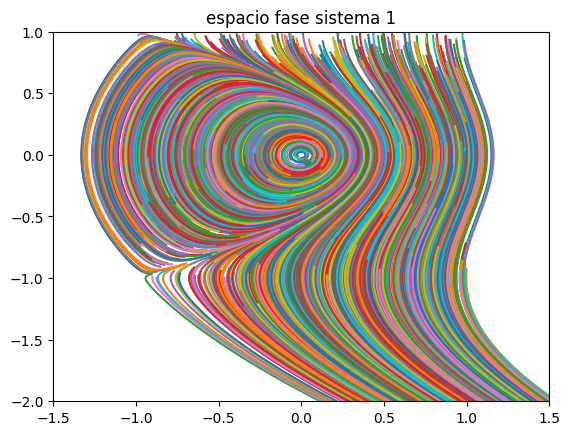

(-2,1)

In [5]:
title("espacio fase sistema 1")
for i in 1:2000
    x0=1*(2*rand()-1)#número al azar entre -1 y 1
    y0=1*(2*rand()-1)#número al azar entre -1 y 1
    x=map(x->x[1],RK(f,p1,[x0,y0]))
    y=map(x->x[2],RK(f,p1,[x0,y0]))
    
    plot(x,y)
end
xlim(-1.5,1.5)
ylim(-2,1)

calculemos el jacobiano de $\vec F$, también conocido como derivada, para ello observemos que $\vec F:\mathbb{R}^2 \rightarrow \mathbb{R}^2$, entonces recordemos el siguiente resultado de cálculo:
si $\vec F:\mathbb{R}^n\rightarrow \mathbb{R}^m$ es derivable en el punto $\vec x_0$, entonces su derivada en el punto $\vec x_0$ es: $$D_{\vec x_0}\vec F=D\vec F(\vec x_0) =\begin{pmatrix}
\nabla _{\vec x_0}f_1 \\
\nabla_{\vec x_0} f_2 \\
. \\
.\\
.\\
\nabla_{\vec x_0} f_m \\
\end{pmatrix}$$
donde $\vec F(\vec x)=(f_1(\vec x),f_2(\vec x),\ldots,f_m(\vec x))$ y además $\nabla _{\vec x_0}f_i=\left(\frac{\partial}{\partial x_1}f_i (\vec x_0),\frac{\partial}{\partial x_2}f_i (\vec x_0),\ldots,\frac{\partial}{\partial x_n}f_i (\vec x_0)\right)$ con $i=1,2,\ldots,m$, de esta manera en nuestro caso $n=m=2$, por tanto:
$f_1(x,y)=y-y^3$ y $f_2(x,y)=-x-y^2$, de esta manera:
$$DF(0)=\begin{pmatrix}
\frac{\partial}{\partial x}\left(y-y^3\right) (\vec 0)&\frac{\partial}{\partial y}\left(y-y^3\right) (\vec 0) \\
\frac{\partial}{\partial x}\left(-x-y^2\right) (\vec 0)&\frac{\partial}{\partial y}\left(-x-y^2\right) (\vec 0) \\
\end{pmatrix}=\begin{pmatrix}
0(\vec 0)& 1(\vec 0)-2y(\vec 0)\\
-1(\vec 0)&-2y(\vec 0) \\
\end{pmatrix}=\begin{pmatrix}
0&1 \\
-1&0 \\
\end{pmatrix}$$
de aqui notamos que $det(D\vec F(\vec 0))=1$ y $tr(D\vec F(\vec 0))=0$, así que se concluye que $\vec 0$ es un punto centro

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?

notemos que si $\dot{x}=v$, entonces se tiene que $\dot{v}-\mu (1-x^2)v+x=0$, de donde se tiene el sistema:
$$\begin{pmatrix}
\dot{v}(t) \\
\dot{x}(t) \\
\end{pmatrix}=\begin{pmatrix}
\mu [1-x^2(t)]v(t)-x(t) \\
v(t) \\
\end{pmatrix}$$ esto lo tomaremos en cuenta para definir nuestra función

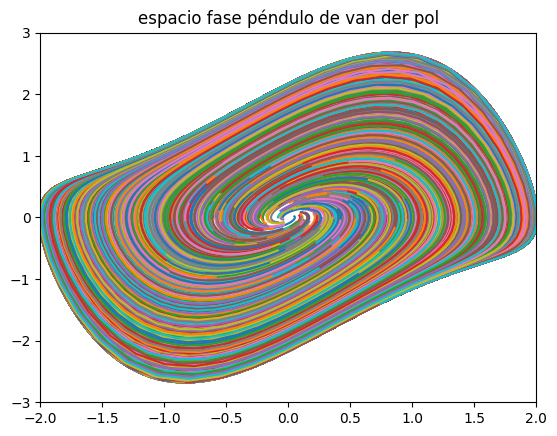

(-3,3)

In [6]:
g(x,t)=[x[2],-x[1]+x[2]*(1-x[1]^2)] #esta es nuestra función asociada
p2=0:0.1:10 
title("espacio fase péndulo de van der pol")
for i in 1:2000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x=map(x->x[1],RK(g,p2,[x0,y0]))
    y=map(x->x[2],RK(g,p2,[x0,y0]))
    
    plot(x,y)
end
xlim(-2,2)
ylim(-3,3)

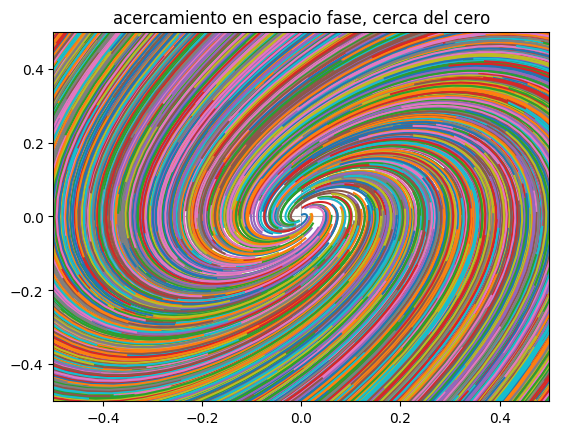

(-0.5,0.5)

In [7]:
title("acercamiento en espacio fase, cerca del cero")
grid("on")
for i in 1:5000
    x0=0.5*(2*rand()-1)
    y0=0.5*(2*rand()-1)
    x=map(x->x[1],RK(g,p2,[x0,y0]))
    y=map(x->x[2],RK(g,p2,[x0,y0]))
    plot(x,y)
end
xlim(-0.5,0.5)
ylim(-0.5,0.5)

de aqui notamos dos cosas, en primer lugar son espirales, las cuales cada vez se acercan mas al punto origen, además notemos que el movimiento en las cercanias es brusco, pues independientemente de hacía donde se mueva la partícula, se aproxima al $0$,pero conforme se acerca, se hace cada vez mas pequeña la velocidad después avanza una distancia apreciablemente menor a la mitad de la original de la izquierda y luego su velocidad cambia de dirección y se frena muy fuerte, en algunos casos incluso se para de golpe en el $0$, en los casos que no lo hace, de nuevo se repite, es decir, avanza hacía el cero disminuyendo su velocidad, cambia de signo y regresa, pero se va frenando bruscamente pues cada vez se reduce el alcance a menos de l